# PHYS-GA2059 - Statistics and Data Science for Physicists
# Student: Gehan Ranepura
## Problem Set #1 - Exercise 3 
Hogg et al. (2010). Data analysis recipes: Fitting a model to data.
https://doi.org/10.48550/arXiv.1008.4686

Generalize the method of this Section to fitt a general quadratic(second order) relationship. 
Add another column to matrix A containing the values $x_i^2$, and another element to vector X (call it q). 
Then re-do Exercise 1 but fittting for and plotting the best quadratic relationship
$ g(x) = qx^2 + mx + b $.
Your plot should end up looking like Figure 3.

In [1]:
import sys
import pandas as pd
import numpy as np
import ipywidgets as widgets
import IPython
import matplotlib as mpl
import matplotlib.pyplot as plt

from numpy.linalg import inv
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from pylab import cm

''' Set up Plot Style ''' 

# plt.style.use(['science','nature'])
plt.style.use('classic')
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.which'] = 'both'
mpl.rcParams['xtick.minor.visible'] = True

## use (4,3) for 2 column plots, (8,6) for single plots.
fgsz_1 = (8,6)
fgsz_2 = (4,3)

In [2]:
data_file = np.loadtxt("data.txt", dtype=float)
data = data_file[4:,0:3]
print(data)

#  Read data file at path 'file_path'. Return a np array data = array(...).
#  Read data to ignore the first 5 data points

[[203. 495.  21.]
 [ 58. 173.  15.]
 [210. 479.  27.]
 [202. 504.  14.]
 [198. 510.  30.]
 [158. 416.  16.]
 [165. 393.  14.]
 [201. 442.  25.]
 [157. 317.  52.]
 [131. 311.  16.]
 [166. 400.  34.]
 [160. 337.  31.]
 [186. 423.  42.]
 [125. 334.  26.]
 [218. 533.  16.]
 [146. 344.  22.]]


# Standard weighted least-square fit

The total squared error, scaled by the uncertainties ($\chi^2$), is given by
$$\chi^2=\sum_{i=1}^N \frac{\left[y_i-f\left(x_i\right)\right]^2}{\sigma_{y i}^{2}} \equiv[\boldsymbol{Y}-\boldsymbol{X} \boldsymbol{\Theta}]^{\top} \boldsymbol{C}^{-1}[\boldsymbol{Y}-\boldsymbol{X} \boldsymbol{\Theta}]$$  

where, 
$$ f\left(x_i\right) = q x_i^{2} + m x_i + b $$ 

The quadratic weighted least-square fit $\Theta = (m,b)$ is solved to be:
$$\hat{\mathbb{  \Theta }} = 
\left[\begin{array}{c}
\hat{q} \\
\hat{m}  \\
\hat{b} 
\end{array}\right] =
\text{argmin}_{q,m,b} \{\chi^2\}= \left[\boldsymbol{X}^{\top} \boldsymbol{C}^{-1} \boldsymbol{X}\right]^{-1}\left[\boldsymbol{X}^{\top} \boldsymbol{C}^{-1} \boldsymbol{Y}\right]$$

where, the matrix dimensions are
$$ \hat{\mathbb{  \Theta }} \rightarrow \boldsymbol{ [ (3 x n) * (n x n) * (n x 3) ]  ^ {-1} * [ (3 x n) * (n x n) * (n x 1) ] } $$

$$ \hat{\mathbb{  \Theta }} \rightarrow \boldsymbol{ (3 x 3) * (3 x 1) } $$

$$ \hat{\mathbb{  \Theta }} \rightarrow \boldsymbol{ (3 x 1) } $$

## Build Matrices

In [3]:
# Row Vectors of data
xs = data[:,0]
ys = data[:,1]
ysigs = data[:,2]

# Column Vectors for Matrices
xs = xs[..., None] 
num_rows, num_cols = xs.shape
X0 = np.ones((num_rows,1))
X = np.hstack((xs*xs,xs,X0))
Y = ys[..., None] 

# Create covariance Matrix
ysigs_inv2 = ysigs**-2
Cinv = np.diag(ysigs_inv2)

# Solve Matrix Multiplication Equation
A = X.T @ Cinv @ X
B = X.T @ Cinv @ Y
theta = np.linalg.solve(A, B)

q = float(theta[0][0])
m = float(theta[1][0])
b = float(theta[2][0])

The uncertainty in parameters $q,m,b$ is given by 
$ [ \boldsymbol{X}^{\top} \boldsymbol{C}^{-1} \boldsymbol{X} ]^{-1} $

Explicitly,

$$
[ \boldsymbol{X}^{\top} \boldsymbol{C}^{-1} \boldsymbol{X} ]^{-1} = 
\left[\begin{array}{cc}
\sigma_q^2 & \sigma_{q,m} & \sigma_{q,m,b} \\
\sigma_{q,m} & \sigma_m^2 & \sigma_{m,b}   \\
\sigma_{q,m,b} & \sigma_{m,b} & \sigma_b^2
\end{array}\right]
$$


In [4]:
# Solve Uncertainties
invA  = np.linalg.inv(A)
q_sig = np.sqrt(invA[0][0])
m_sig = np.sqrt(invA[1][1])
b_sig = np.sqrt(invA[2][2])

q_res =  "%s \pm %s"%(round(q,4),round(q_sig,4))
m_res =  "%s \pm %s"%(round(m,2),round(m_sig,2))
b_res =  "%s \pm %s"%(round(b,2),round(b_sig,2))

print(q_res)
print(m_res)
print(b_res)

0.0023 \pm 0.002
1.6 \pm 0.58
72.89 \pm 38.91


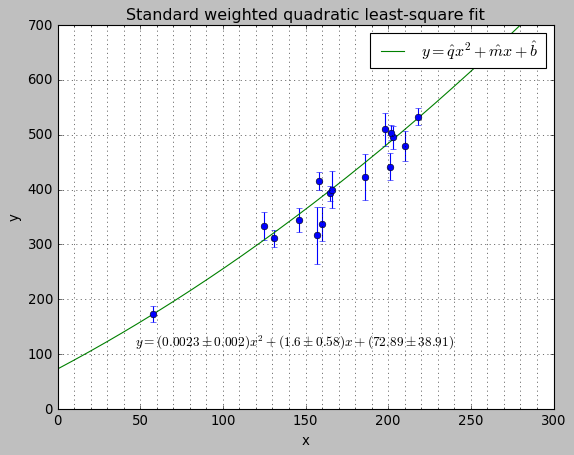

<Figure size 640x480 with 0 Axes>

In [5]:
#%matplotlib widget
#from IPython import get_ipython
#get_ipython().run_line_magic('matplotlib', 'inline')

fig, ax = plt.subplots(figsize=fgsz_1)

ax.set_xlim([0, 300])
ax.set_ylim([0, 700])
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.linspace(0,300,400)

ax.errorbar(xs , ys, yerr = ysigs, fmt='o')  
ax.plot(xx , q*xx**2 + m*xx + b, label='$y = \hat{q} x^2 + \hat{m} x +\hat{b}$')  
         
ax.set_title('Standard weighted quadratic least-square fit' )
ax.annotate("$y = (%s) x^2 + (%s) x + (%s) $"%(q_res,m_res,b_res)   , xy=(1, 1),  xycoords='data',
            xytext=(0.8, 0.15), textcoords='axes fraction',
            # arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom',
            )

plt.legend()
plt.show()
plt.savefig('plot.png', transparent=False, bbox_inches='tight')